# 1. Downloading the Dataset from Kaggle

In [131]:
!pwd

/content


In [132]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [133]:
!chmod 600 /content/kaggle.json

In [4]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 174MB/s]


In [5]:
!unzip sentiment-analysis-on-movie-reviews.zip -d data

Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: data/sampleSubmission.csv  
  inflating: data/test.tsv.zip       
  inflating: data/train.tsv.zip      


In [6]:
train_fname = 'data/train.tsv.zip'
test_fname = 'data/test.tsv.zip'
sub_fname = 'data/sampleSubmission.csv'

# Explore and Visualize the Data


*   Load the train,test and submission files using Pandas
*   Explore rows, columns and sample values,etc.
*   Visualize distribution of target columns





In [7]:
import pandas as pd

In [8]:
raw_df = pd.read_csv(train_fname,sep = '\t')

In [9]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [10]:
raw_df.Phrase.sample(10).values

array(['operates', 'especially in a moral sense',
       'A grating , emaciated flick', 'psycho killer',
       'by an esteemed writer-actor', 'tortured and', 'the con',
       ', observant',
       'should have been a more compelling excuse to pair Susan Sarandon and Goldie Hawn',
       "' I speak fluent flatula , ' advises Denlopp after a rather , er , bubbly exchange with an alien deckhand -RRB-"],
      dtype=object)

In [11]:
test_df = pd.read_csv(test_fname,sep='\t')
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [12]:
sub_df = pd.read_csv(sub_fname)
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [13]:
raw_df.Sentiment.value_counts(normalize=True)

2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: Sentiment, dtype: float64

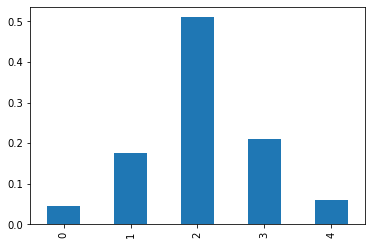

In [14]:
raw_df.Sentiment.value_counts(normalize=True).sort_index().plot(kind='bar')

It can be seen that mostly movies are given with the sentiment rating 2 which means they are neutral.

# Implement TF-IDF Technique
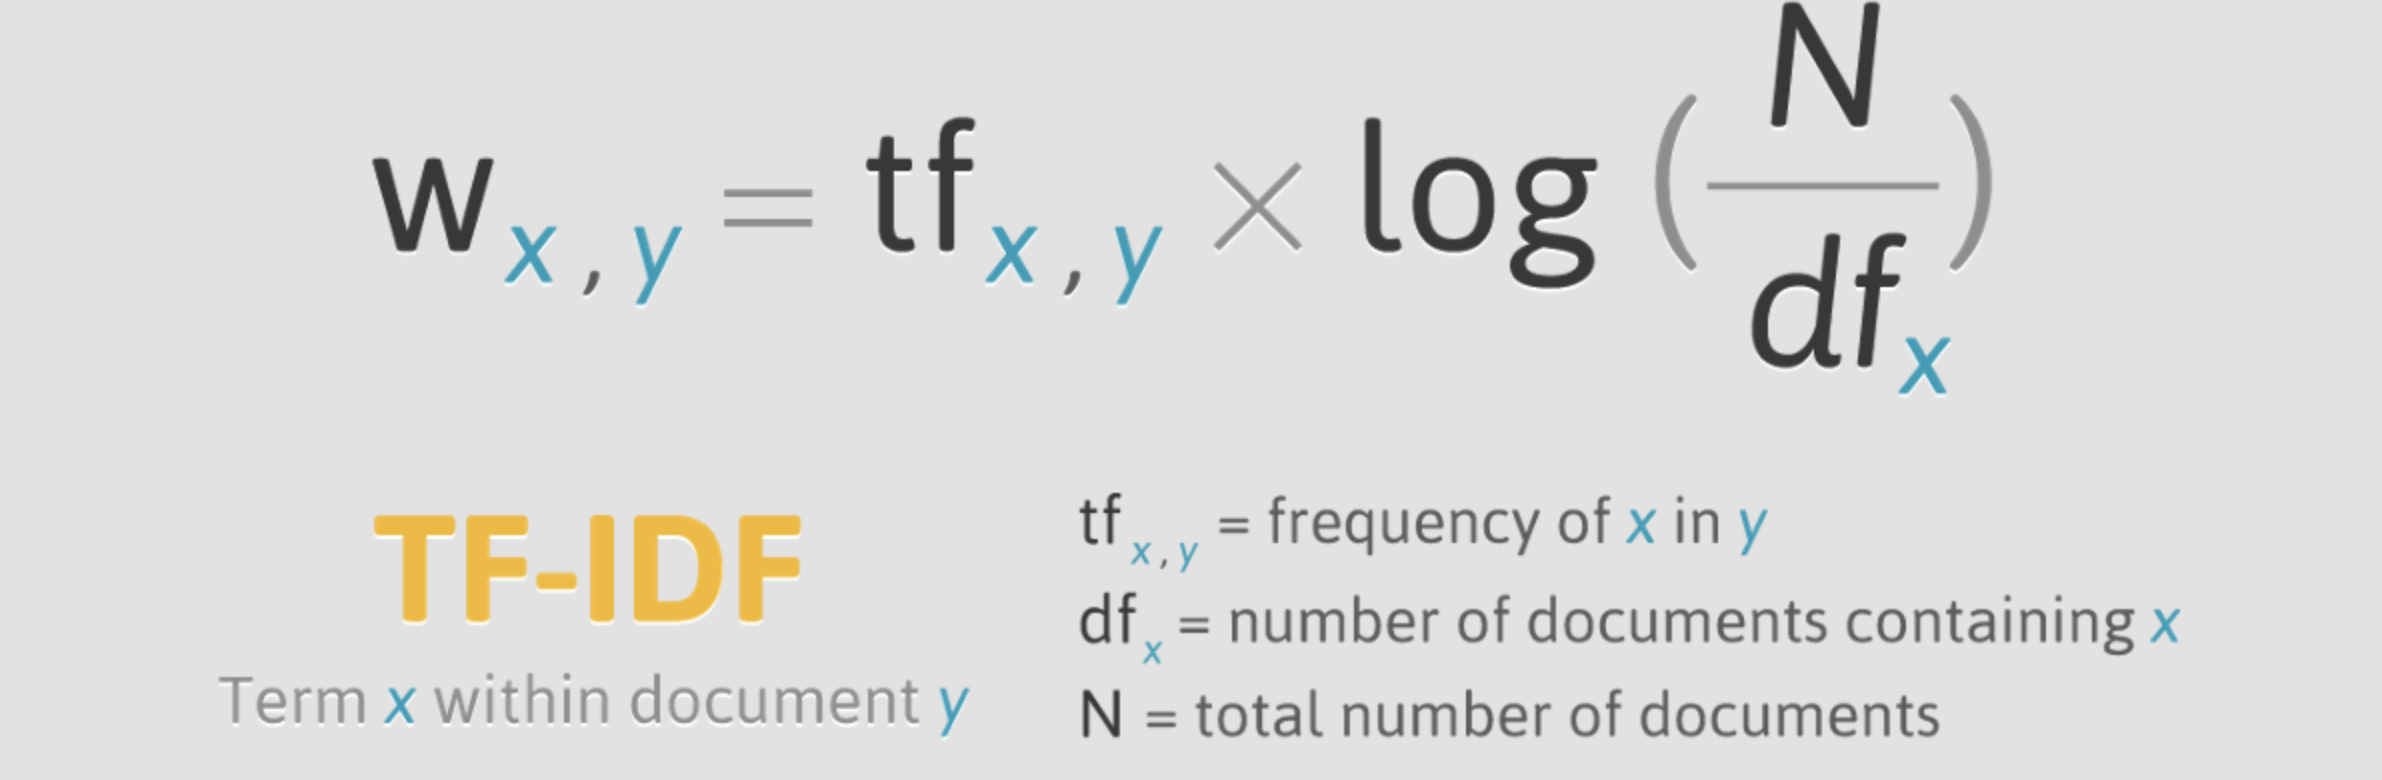

We know that Bag of words creates a vector that contains the count of each word in the given sentence.
Instead of actually keeping the count, we can multiply the count with the inverse document frequency

So if any word contains more of that value which means that the word is present in most of the sentences, then we dont want to take them into account of learning 

#### Learn Vocabulary using `TfidfVectorizer `

* Create custom tokenizer with stemming
* Create a list of stop words
* Configure and create `TfidfVectorizer `
* Learn vocubulary from training set
* View sample entries from vocabulary

In [15]:
from nltk.tokenize import word_tokenize

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
word_tokenize("This is Aakkash. How are you?")

['This', 'is', 'Aakkash', '.', 'How', 'are', 'you', '?']

In [18]:
from nltk.stem.snowball import SnowballStemmer

In [19]:
stemmer = SnowballStemmer(language='english')

In [20]:
stemmer.stem("Eating")

'eat'

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
from nltk.corpus import stopwords
english_sw = stopwords.words('english')[:115]

In [23]:
def tokenize(word):
  return [stemmer.stem(w) for w in word_tokenize(word) if w.isalpha()]

In [24]:
tokenize("This is Aakkash. I'm eating")

['this', 'is', 'aakkash', 'i', 'eat']

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
vectorizer = TfidfVectorizer(tokenizer=tokenize,stop_words=english_sw,ngram_range=(1,2),max_features=2400)

In [27]:
vectorizer.fit(raw_df.Phrase)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'ourselv', 'themselv', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


TfidfVectorizer(max_features=2400, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7fdbb5831d30>)

In [28]:
len(vectorizer.vocabulary_)

2400

In [29]:
vectorizer.get_feature_names_out()[:100]

array(['abandon', 'abil', 'abl', 'abov', 'absolut', 'absorb', 'abstract',
       'absurd', 'abus', 'academi', 'accent', 'accept', 'access',
       'accomplish', 'account', 'accur', 'ach', 'achiev', 'across', 'act',
       'action', 'action film', 'action movi', 'action sequenc', 'actor',
       'actress', 'actual', 'ad', 'adam', 'adam sandler', 'adapt', 'add',
       'addit', 'adequ', 'admir', 'admit', 'adolesc', 'adult', 'advantag',
       'adventur', 'affair', 'affect', 'affirm', 'afraid', 'age',
       'aggress', 'ago', 'ahead', 'aid', 'aim', 'aimless', 'air', 'album',
       'alien', 'aliv', 'allen', 'allow', 'almost', 'almost everi',
       'alon', 'along', 'alreadi', 'also', 'altern', 'although', 'alway',
       'amateurish', 'amaz', 'ambigu', 'ambit', 'ambiti', 'america',
       'american', 'ami', 'among', 'amount', 'amus', 'analyz', 'angel',
       'angl', 'angst', 'anguish', 'ani', 'ani movi', 'anim', 'ann',
       'annoy', 'anoth', 'answer', 'antic', 'antwon', 'antwon fisher'

### Transform Training & Test Data

* Transform phrases from training set
* Transform phrases from test set
* Look at some example values

In [30]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [31]:
inputs = vectorizer.transform(raw_df.Phrase)

In [32]:
inputs.shape

(156060, 2400)

In [33]:
inputs.toarray()[0][:200]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.27620188, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [34]:
raw_df.Phrase[0]

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [35]:
test_inputs = vectorizer.transform(test_df.Phrase)

In [36]:
test_inputs.shape

(66292, 2400)

In [37]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


## Train Baseline Model & Submit to Kaggle

1. Split training and validation sets
2. Train logistic regression model
3. Study predictions on sample phrases
4. Make predictions and submit to Kaggle



We cannot perform a random splitting for the train and the validation set. The reason is because the input dataframe contains phrases from a single or same sentence and if random splitting is done, this could lead to the fact that some data is present in the training and some is present in the validation set

So what we can do is that from 150K rows, we can have 100K for the training and remainig 50K for the validation set

In [38]:
train_size = 100_000

In [39]:
train_inputs  = inputs[:train_size]
train_targets = raw_df.Sentiment[:train_size]

In [40]:
train_inputs.shape,train_targets.shape

((100000, 2400), (100000,))

In [41]:
val_inputs = inputs[train_size:]
val_targets = raw_df.Sentiment[train_size:]

In [42]:
val_inputs.shape,val_targets.shape

((56060, 2400), (56060,))

# Train a Logistic regression model

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model = LogisticRegression()

In [45]:
model.fit(train_inputs,train_targets)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
train_preds = model.predict(train_inputs)

In [47]:
train_targets

0        1
1        2
2        2
3        2
4        2
        ..
99995    2
99996    2
99997    3
99998    2
99999    4
Name: Sentiment, Length: 100000, dtype: int64

In [48]:
train_preds

array([3, 2, 2, ..., 2, 2, 2])

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(train_preds,train_targets)

0.64771

In [50]:
val_preds = model.predict(val_inputs)
accuracy_score(val_preds,val_targets)

0.5807170888333928

# Study Predictions on Sample inputs

In [51]:
small_df = raw_df.sample(20)

In [52]:
small_df

,PhraseId,SentenceId,Phrase,Sentiment
136746,136747,7395,'s too bad that the rest is n't more compelling,1
115627,115628,6163,Israel in ferment,2
35287,35288,1658,had this much imagination and nerve,3
118271,118272,6319,compliment to say that the film makes the view...,3
55065,55066,2744,", perhaps paradoxically , illuminated",2
72259,72260,3693,of lively songs for deft punctuation,2
8715,8716,363,sloppy,0
90254,90255,4697,bigger-name,2
77150,77151,3969,between these two marginal characters,1
124099,124100,6662,though her talent is supposed to be growing,2


In [53]:
small_inputs = vectorizer.transform(small_df.Phrase)

In [54]:
small_inputs.shape

(20, 2400)

In [55]:
small_preds = model.predict(small_inputs)
small_preds

array([1, 2, 2, 3, 2, 3, 0, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 4, 2])

In [56]:
small_df.Sentiment

136746    1
115627    2
35287     3
118271    3
55065     2
72259     2
8715      0
90254     2
77150     1
124099    2
86207     1
109639    2
97223     1
33897     4
29523     2
113159    2
16572     2
53006     2
132825    3
45442     2
Name: Sentiment, dtype: int64

### Make Predictions & Submit to Kaggle

1. Make predictions on Test Dataset
2. Generate & submit CSV on Kaggle
3. Add screenshot of your score 


In [57]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [140]:
test_preds = model.predict(test_inputs)
test_preds

66292

In [59]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [60]:
sub_df.Sentiment = test_preds

In [61]:
sub_df

,PhraseId,Sentiment
0,156061,3
1,156062,3
2,156063,2
3,156064,3
4,156065,3
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [62]:
sub_df.to_csv('first_submission.csv',index = None)

In [63]:
!head first_submission.csv

PhraseId,Sentiment
156061,3
156062,3
156063,2
156064,3
156065,3
156066,3
156067,3
156068,2
156069,3


# Testing out with Decision Trees

In [64]:
from sklearn.tree import DecisionTreeClassifier
model_1 = DecisionTreeClassifier()

In [65]:
model_1.fit(train_inputs,train_targets)

DecisionTreeClassifier()

In [66]:
train_preds = model_1.predict(train_inputs)
accuracy_score(train_preds,train_targets)

0.79861

In [67]:
val_preds = model_1.predict(val_inputs)
accuracy_score(val_preds,val_targets)

0.5316446664288262

In [68]:
test_preds_1 = model_1.predict(test_inputs)

In [69]:
model_2 = DecisionTreeClassifier(class_weight='balanced',splitter='best',criterion='entropy').fit(train_inputs,train_targets)

In [70]:
accuracy_score(model_2.predict(train_inputs),train_targets)

0.7555

In [71]:
accuracy_score(model_2.predict(val_inputs),val_targets)

0.4656082768462362

In [72]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
              "criterion": ["gini", "entropy"],
              "class_weight":[None,"balanced"],
              "splitter":["best","random"]
              }
model_3 = DecisionTreeClassifier()
model_cv = RandomizedSearchCV(model_3,param_dist,cv=5)
model_cv.fit(train_inputs,train_targets)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'class_weight': [None, 'balanced']})

In [73]:
model_cv.best_params_

{'class_weight': None}

In [74]:
new_model = DecisionTreeClassifier(splitter= 'random',class_weight=None,criterion='gini').fit(train_inputs,train_targets)

In [75]:
accuracy_score(new_model.predict(train_inputs),train_targets)

0.79861

In [76]:
accuracy_score(new_model.predict(val_inputs),val_targets)

0.5406707099536211

In [77]:
new_test_preds = new_model.predict(test_inputs)
new_test_preds

array([2, 2, 2, ..., 2, 2, 1])

In [78]:
sub_df.Sentiment = new_test_preds
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [79]:
sub_df.to_csv('second_submission.csv',index = None)
!head first_submission.csv

PhraseId,Sentiment
156061,3
156062,3
156063,2
156064,3
156065,3
156066,3
156067,3
156068,2
156069,3


# Gradient Boosting

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
model_3 = GradientBoostingClassifier()

In [81]:
%%time
model_3.fit(train_inputs,train_targets)

CPU times: user 1min 19s, sys: 671 ms, total: 1min 20s
Wall time: 1min 20s


GradientBoostingClassifier()

In [82]:
accuracy_score(model_3.predict(train_inputs),train_targets)

0.56173

In [83]:
accuracy_score(model_3.predict(val_inputs),val_targets)

0.5207099536211203

In [84]:
from sklearn.metrics import classification_report
print(classification_report(val_targets,model_3.predict(val_inputs)))

              precision    recall  f1-score   support

           0       0.42      0.06      0.11      2619
           1       0.48      0.07      0.13     10342
           2       0.53      0.97      0.68     27799
           3       0.46      0.09      0.15     11835
           4       0.51      0.07      0.12      3465

    accuracy                           0.52     56060
   macro avg       0.48      0.25      0.24     56060
weighted avg       0.50      0.52      0.41     56060



In [85]:
from sklearn.datasets import make_hastie_10_2
from scipy.stats import loguniform

In [ ]:
param_distributions = {
    "learning_rate": loguniform(0.01, 1),
    "max_depth":[1,3,5,7,9],
    "n_estimators":[5,50,250,500],

}
search_cv = RandomizedSearchCV(
    GradientBoostingClassifier(), param_distributions=param_distributions,
    scoring="neg_mean_absolute_error", n_iter=20, random_state=0, n_jobs=2
)
search_cv.fit(train_inputs, train_targets)

RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_iter=20, n_jobs=2,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7215b30340>},
                   random_state=0, scoring='neg_mean_absolute_error')

In [128]:
model_4 = GradientBoostingClassifier(learning_rate=0.556,max_depth=9,n_estimators=150).fit(train_inputs,train_targets)

In [129]:
accuracy_score(model_4.predict(train_inputs),train_targets)

0.74214

In [ ]:
accuracy_score(model_4.predict(val_inputs),val_targets)

0.5641633963610417

In [134]:
model_5 = GradientBoostingClassifier(learning_rate=0.556,max_depth=9,n_estimators=200).fit(train_inputs,train_targets)
print(accuracy_score(model_5.predict(train_inputs),train_targets))
print(accuracy_score(model_5.predict(val_inputs),val_targets))

0.74742
0.5668926150552979


In [141]:
new_test_prediction = model_5.predict(test_inputs)
new_test_prediction

array([3, 3, 2, ..., 2, 2, 1])

In [142]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [143]:
sub_df.Sentiment = new_test_prediction
sub_df

,PhraseId,Sentiment
0,156061,3
1,156062,3
2,156063,2
3,156064,3
4,156065,3
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [144]:
sub_df.to_csv('third_submission.csv',index = None)
!head third_submission.csv

PhraseId,Sentiment
156061,3
156062,3
156063,2
156064,3
156065,3
156066,3
156067,3
156068,2
156069,4


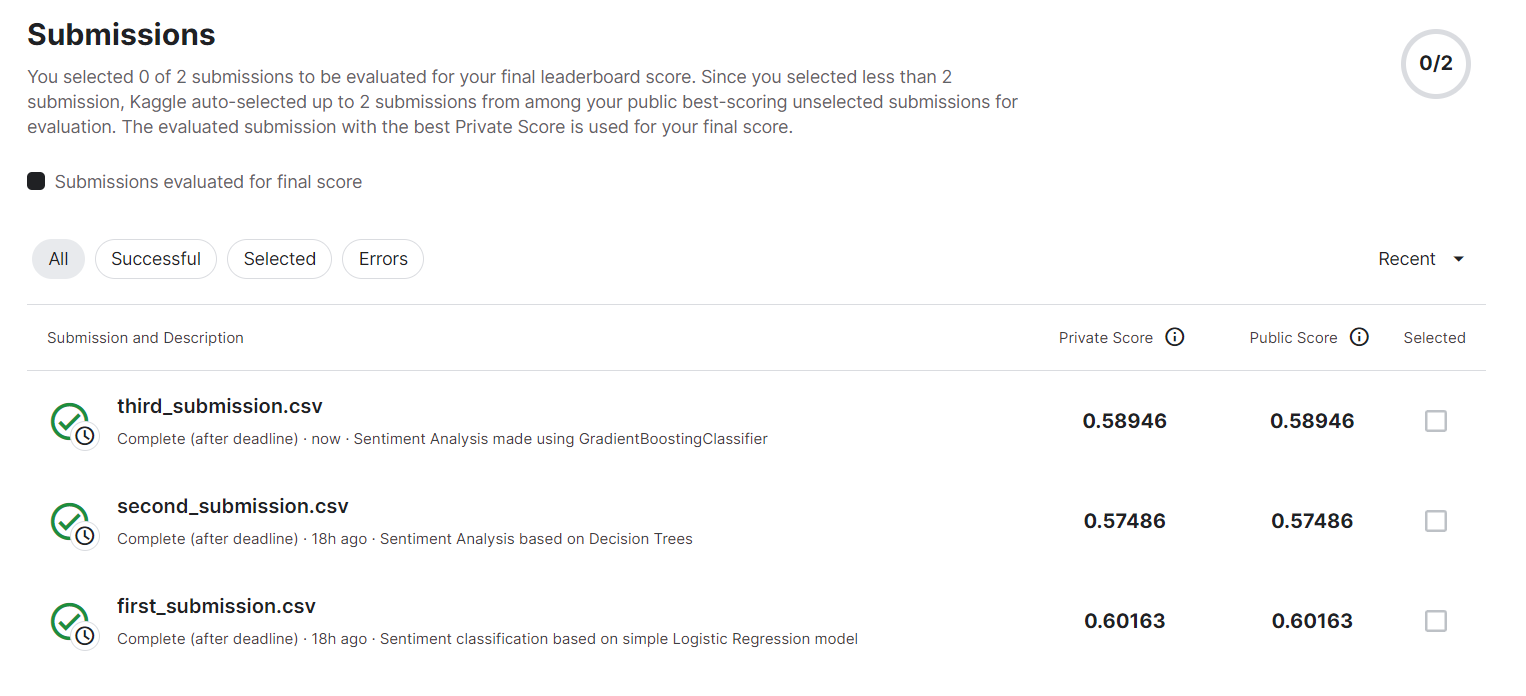